#勾配消失問題

**勾配消失（Gradient Vanishing）**問題は、ニューラルネットワークのトレーニング中にしばしば問題となる現象です。以下のような状況で発生します：

##勾配消失現象の原因
###活性化関数の特性：

- 一部の活性化関数（例えばシグモイド関数）は、入力値が大きくなると**勾配が0に近づく**性質があります。このため、ネットワークの層が深くなるほど、逆伝播の際に勾配が小さくなりすぎてしまいます。
重みの初期化：

- ニューラルネットワークの重みを**適切に初期化しない**と、勾配が消失しやすくなります。特に、重みがゼロに近い値で初期化されると、ネットワークの学習が遅くなります。
ネットワークの深さ：

- **ネットワークが非常に深い**場合、誤差の逆伝播が層を通過する際に勾配が急激に小さくなり、結果として初期層の学習が困難になります。

下図に示されているように、$x$の値が正・負関係なく大きくなると勾配がほぼゼロになってしまうため、層が深くなると連鎖率で小さな値の積が重なることになります。そのため、出力層における誤差への寄与が浅い層までに伝わって来なくなります。すなわち、勾配（誤差に対する重みの責任）が適切に評価できなくなり、効率よく学習ができません。

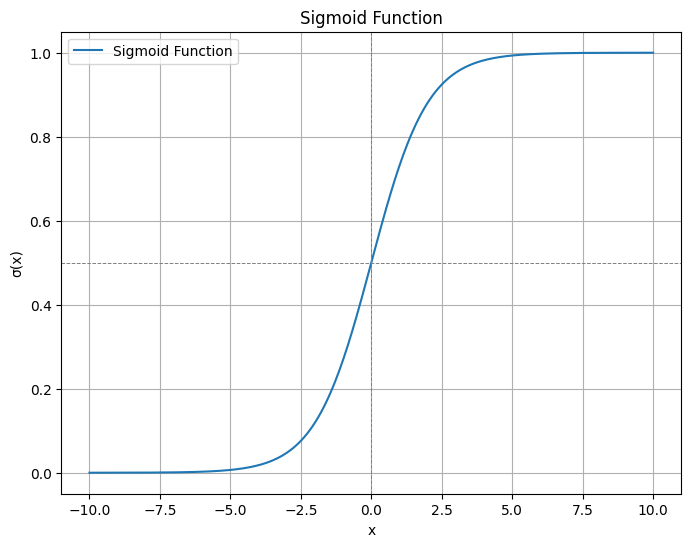

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# シグモイド関数の定義
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

# xの範囲を設定
x = np.linspace(-10, 10, 400)
# シグモイド関数の値を計算
y = sigmoid(x)

# グラフの描画
plt.figure(figsize=(8, 6))
plt.plot(x, y, label='Sigmoid Function')
plt.title('Sigmoid Function')
plt.xlabel('x')
plt.ylabel('σ(x)')
plt.grid(True)
plt.axhline(0.5, color='gray', linestyle='--', linewidth=0.7)
plt.axvline(0, color='gray', linestyle='--', linewidth=0.7)
plt.legend()
plt.show()

**シグモイド関数**

シグモイド関数の微分（勾配）$x$の絶対値が5より大きくなると傾きがほぼ0になってしまい、勾配が消失してしまいます。下図において、赤の破線がシグモイド関数の微分を表します。

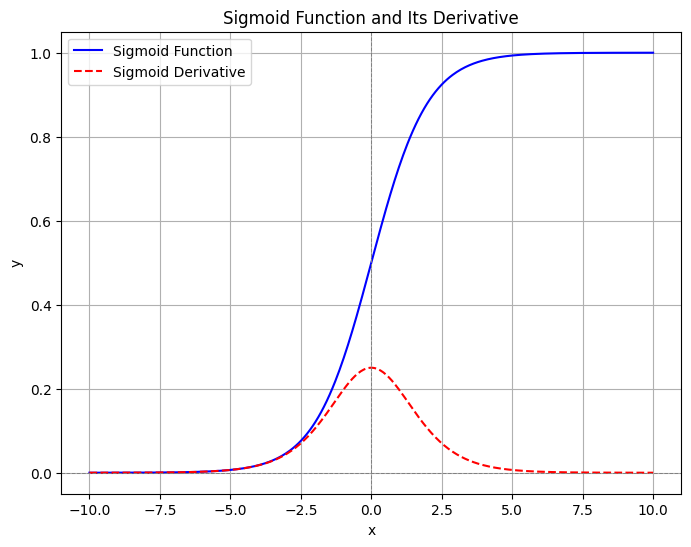

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# シグモイド関数の定義
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

# シグモイド関数の導関数
def sigmoid_derivative(x):
    s = sigmoid(x)
    return s * (1 - s)

# xの範囲を設定
x = np.linspace(-10, 10, 400)
# シグモイド関数とその導関数の値を計算
y = sigmoid(x)
dy = sigmoid_derivative(x)

# グラフの描画
plt.figure(figsize=(8, 6))
plt.plot(x, y, label='Sigmoid Function', color='blue')
plt.plot(x, dy, label='Sigmoid Derivative', color='red', linestyle='--')
plt.title('Sigmoid Function and Its Derivative')
plt.xlabel('x')
plt.ylabel('y')
plt.grid(True)
plt.axhline(0, color='gray', linestyle='--', linewidth=0.7)
plt.axvline(0, color='gray', linestyle='--', linewidth=0.7)
plt.legend()
plt.show()


**シグモイド関数とその微分**

tanh関数の場合も、シグモイド関数よりはましではあるが、勾配消失が起きやすい、特性をもっていることがわかります。

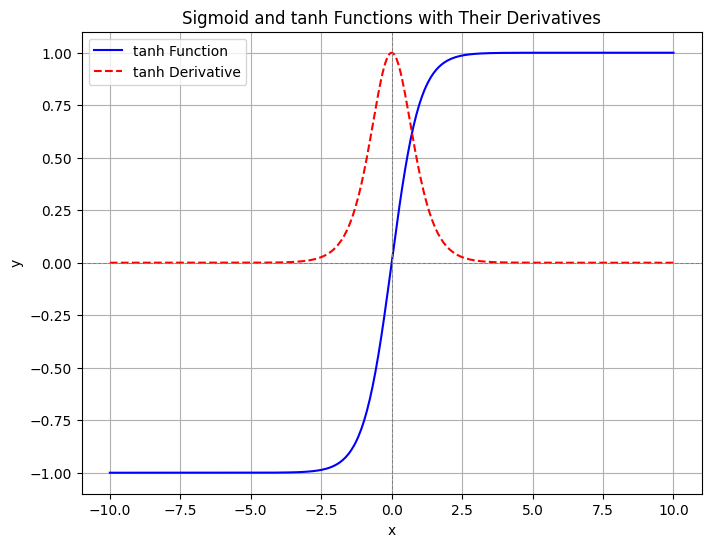

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# tanh関数の定義
def tanh(x):
    return np.tanh(x)

# tanh関数の導関数
def tanh_derivative(x):
    return 1 - np.tanh(x)**2

# xの範囲を設定
x = np.linspace(-10, 10, 400)
# tanh関数とその導関数の値を計算
tanh_y = tanh(x)
tanh_dy = tanh_derivative(x)

# グラフの描画
plt.figure(figsize=(8, 6))

# tanh関数の描画
plt.plot(x, tanh_y, label='tanh Function', color='blue')
# tanh関数の導関数の描画
plt.plot(x, tanh_dy, label='tanh Derivative', color='red', linestyle='--')

# グラフの装飾
plt.title('Sigmoid and tanh Functions with Their Derivatives')
plt.xlabel('x')
plt.ylabel('y')
plt.grid(True)
plt.axhline(0, color='gray', linestyle='--', linewidth=0.7)
plt.axvline(0, color='gray', linestyle='--', linewidth=0.7)
plt.legend()
plt.show()


**tanh関数とその微分**

この勾配消失問題を解決するために、2012年ILSVRCにて優勝を果し、ディープラーニングのブレークスルーを起こした、AlexNetで初めて採用され、その効果で世を驚かせた活性化関数がReLUです。ReLUは非正則関数であり、$x$が0より小さい場合には、すべて0で定義されるため、その勾配は0となります。$x$が0より大きい場合には、勾配が常に1となり、少なくとも活性化関数が勾配消失の原因になることは避けることができます。

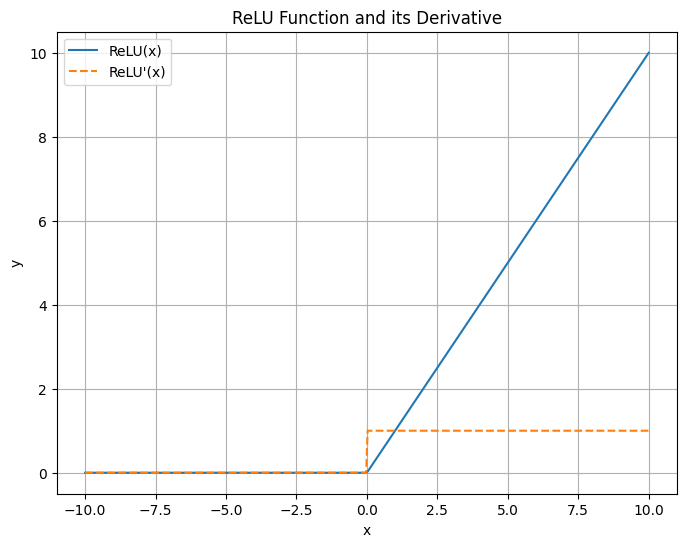

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# ReLU function
def relu(x):
    return np.maximum(0, x)

# Derivative of ReLU function
def relu_derivative(x):
    return np.where(x > 0, 1, 0)

# Generate x values
x = np.linspace(-10, 10, 400)

# Calculate y values
y_relu = relu(x)
y_relu_derivative = relu_derivative(x)

# Plot ReLU function
plt.figure(figsize=(8, 6))
plt.plot(x, y_relu, label="ReLU(x)")
plt.plot(x, y_relu_derivative, label="ReLU'(x)", linestyle='--')
plt.title("ReLU Function and its Derivative")
plt.xlabel("x")
plt.ylabel("y")
plt.legend()
plt.grid(True)
plt.show()


**ReLU関数とその微分**

$x$が負の値を持つと$y$はすべて$0$となり、傾きも$0$となります。$x$が正の場合は、$x$の値に関係なく、常に$1$となります。

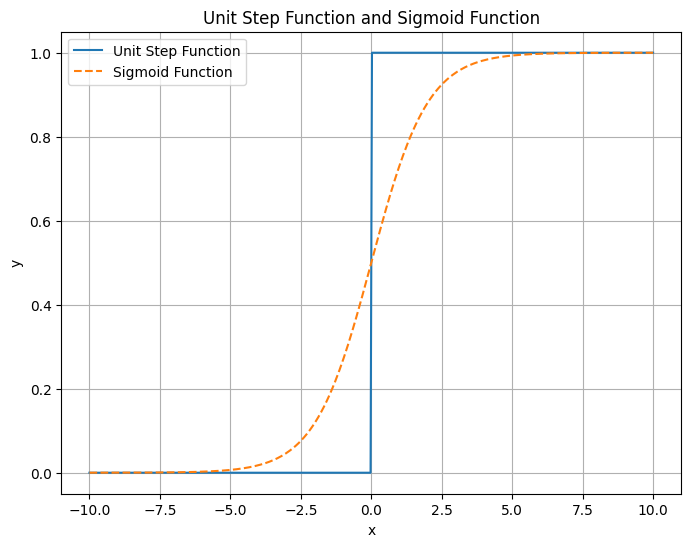

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Unit step function
def unit_step(x):
    return np.where(x >= 0, 1, 0)

# Sigmoid function
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

# Generate x values
x = np.linspace(-10, 10, 400)

# Calculate y values
y_step = unit_step(x)
y_sigmoid = sigmoid(x)

# Plot Unit Step function and Sigmoid function
plt.figure(figsize=(8, 6))
plt.plot(x, y_step, label="Unit Step Function")
plt.plot(x, y_sigmoid, label="Sigmoid Function", linestyle='--')
plt.title("Unit Step Function and Sigmoid Function")
plt.xlabel("x")
plt.ylabel("y")
plt.legend()
plt.grid(True)
plt.show()


**Step関数とその微分**

上のグラフはStep関数とシグモイド関数の比較を示しています。ここで、Step関数は活性化関数を適用しない場合と同意になります。すなわち、決定境界を空間上の直線で表現し、くっきりとした境界とする意味になります。

これを3次元グラフで表現すると、天と地をくっきり分けていることがわかると思います。

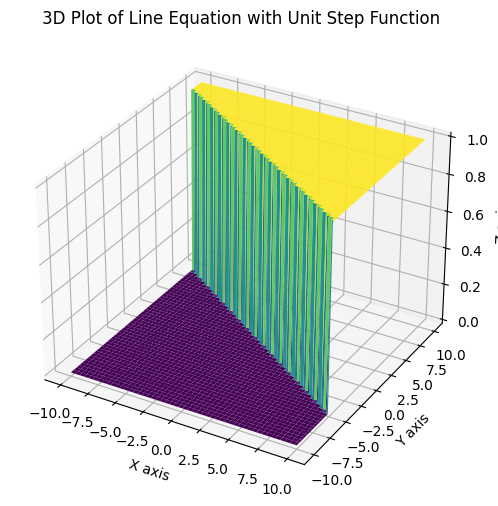

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Unit step function
def unit_step(x):
    return np.where(x >= 0, 1, 0)

# Generate x and y values
x = np.linspace(-10, 10, 100)
y = np.linspace(-10, 10, 100)

# Create a meshgrid
X, Y = np.meshgrid(x, y)

# Equation of a line in the plane (e.g., z = 2x + 3y - 5)
Z = 2 * X + 3 * Y - 5

# Apply unit step function to the line equation
Z_step = unit_step(Z)

# Plotting the 3D graph
fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(X, Y, Z_step, cmap='viridis')

ax.set_title("3D Plot of Line Equation with Unit Step Function")
ax.set_xlabel("X axis")
ax.set_ylabel("Y axis")
ax.set_zlabel("Z axis")

plt.show()


誤差なしで、直線で境界条件を決められる場合は、Step関数を活性化として使用可能ですが、一般的には直線で決定境界が決まらない場合が多いと思います。また、どちらの領域に明確に判定をするのではなく、判定をロジスティックに行う、つまり、確率的に判定をする形が、実用性を高めることが多いです。

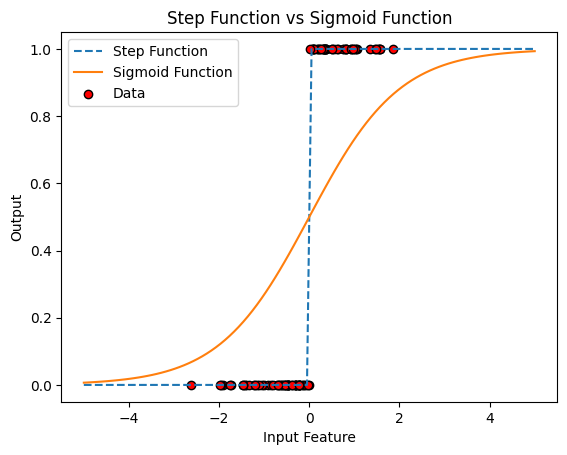

In [ ]:
# シンプルな例として、1次元データを生成
np.random.seed(42)
X_simple = np.random.randn(100, 1)
y_simple = (X_simple > 0).astype(int).ravel()  # Step関数のようなデータ生成

# Step関数とSigmoid関数を使ってモデルを作成
def step_function(x):
    return np.where(x > 0, 1, 0)

def sigmoid_function(x):
    return 1 / (1 + np.exp(-x))

# グラフの描画
x_values = np.linspace(-5, 5, 100)
step_values = step_function(x_values)
sigmoid_values = sigmoid_function(x_values)

plt.plot(x_values, step_values, label='Step Function', linestyle='--')
plt.plot(x_values, sigmoid_values, label='Sigmoid Function')
plt.scatter(X_simple, y_simple, color='red', label='Data', edgecolor='k')
plt.title('Step Function vs Sigmoid Function')
plt.xlabel('Input Feature')
plt.ylabel('Output')
plt.legend()
plt.show()


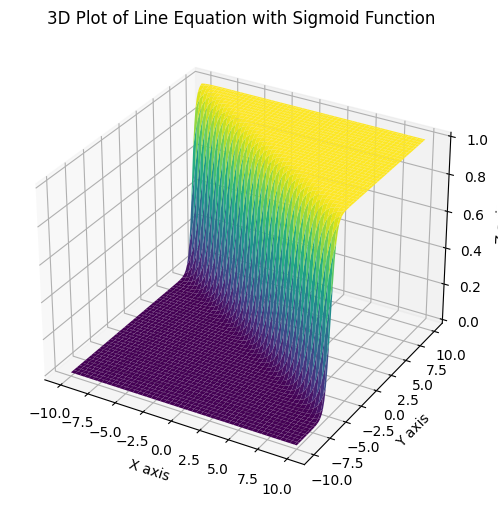

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Sigmoid function
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

# Generate x and y values
x = np.linspace(-10, 10, 100)
y = np.linspace(-10, 10, 100)

# Create a meshgrid
X, Y = np.meshgrid(x, y)

# Equation of a line in the plane (e.g., z = 2x + 3y - 5)
Z = 2 * X + 3 * Y - 5

# Apply sigmoid function to the line equation
Z_sigmoid = sigmoid(Z)

# Plotting the 3D graph
fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(X, Y, Z_sigmoid, cmap='viridis')

ax.set_title("3D Plot of Line Equation with Sigmoid Function")
ax.set_xlabel("X axis")
ax.set_ylabel("Y axis")
ax.set_zlabel("Z axis")

plt.show()


それに対して、シグモイド関数は曲面を形成しており、ファジィな判断ができることがわかります。また、下に示されているReLUの場合には、$x$が0以上の場合は、恒等関数であるため、線形結合の出力値がそのまま出力されます。このことから、勾配消失を起こさずに非線形表現が可能になるメリットがあります。

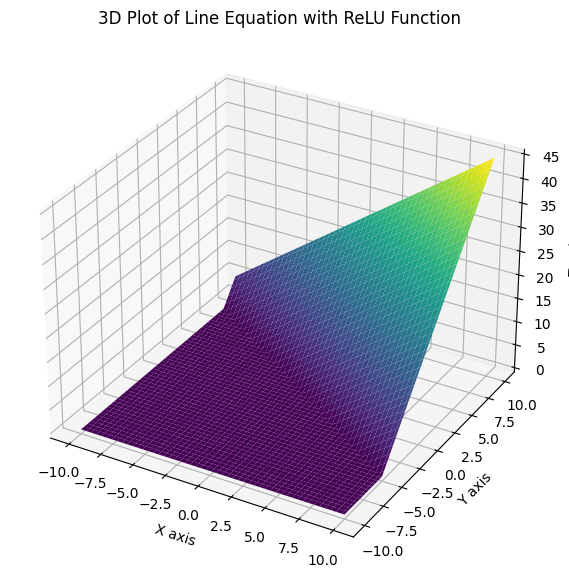

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# ReLU function
def relu(x):
    return np.maximum(0, x)

# Generate x and y values
x = np.linspace(-10, 10, 100)
y = np.linspace(-10, 10, 100)

# Create a meshgrid
X, Y = np.meshgrid(x, y)

# Equation of a line in the plane (e.g., z = 2x + 3y - 5)
Z = 2 * X + 3 * Y - 5

# Apply ReLU function to the line equation
Z_relu = relu(Z)

# Plotting the 3D graph
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(X, Y, Z_relu, cmap='viridis')

ax.set_title("3D Plot of Line Equation with ReLU Function")
ax.set_xlabel("X axis")
ax.set_ylabel("Y axis")
ax.set_zlabel("Z axis")

plt.show()


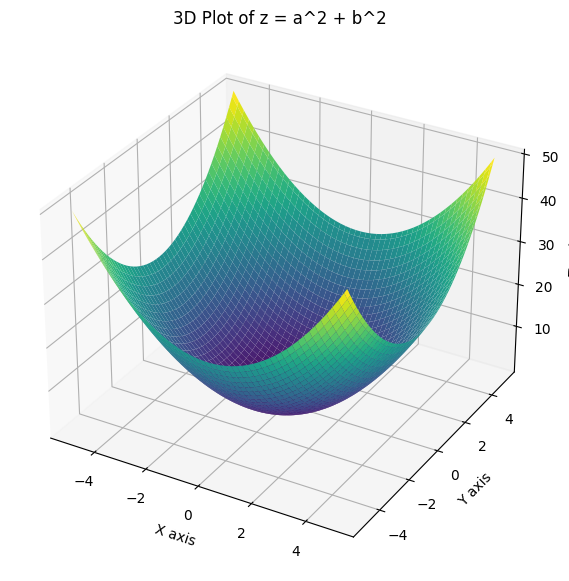

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Generate x and y values
a = np.linspace(-5, 5, 100)
b = np.linspace(-5, 5, 100)

# Create a meshgrid
X, Y = np.meshgrid(a, b)

# Calculate z values
Z = X**2 + Y**2

# Plotting the 3D graph
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(X, Y, Z, cmap='viridis')

ax.set_title("3D Plot of z = a^2 + b^2")
ax.set_xlabel("X axis")
ax.set_ylabel("Y axis")
ax.set_zlabel("Z axis")

plt.show()
